In [5]:
import time

import numpy as np
from sklearn.model_selection import train_test_split

import shap

In [6]:
X, y = shap.datasets.diabetes()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
X_train_summary = shap.kmeans(X_train, 10)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [8]:
def print_accuracy(f):
    print(
        "Root mean squared test error = {}".format(
            np.sqrt(np.mean((f(X_test) - y_test) ** 2))
        )
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [9]:
shap.initjs()


In [11]:
from sklearn import linear_model

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)

print_accuracy(lin_regr.predict)

Root mean squared test error = 58.51717127731562


In [12]:
ex = shap.KernelExplainer(lin_regr.predict, X_train_summary)
shap_values = ex.shap_values(X_test.iloc[0, :])
shap.force_plot(ex.expected_value, shap_values, X_test.iloc[0, :])

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [00:09<00:00,  9.37it/s]
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


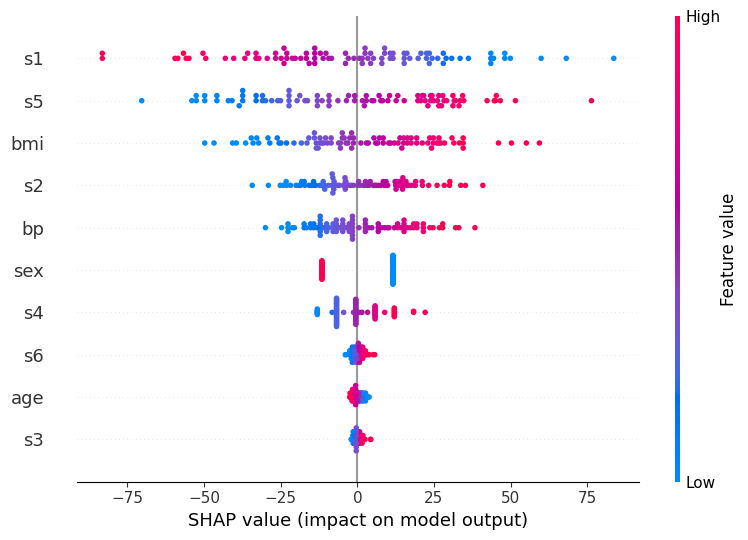

In [13]:
shap_values = ex.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Root mean squared test error = 61.16592960743402


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


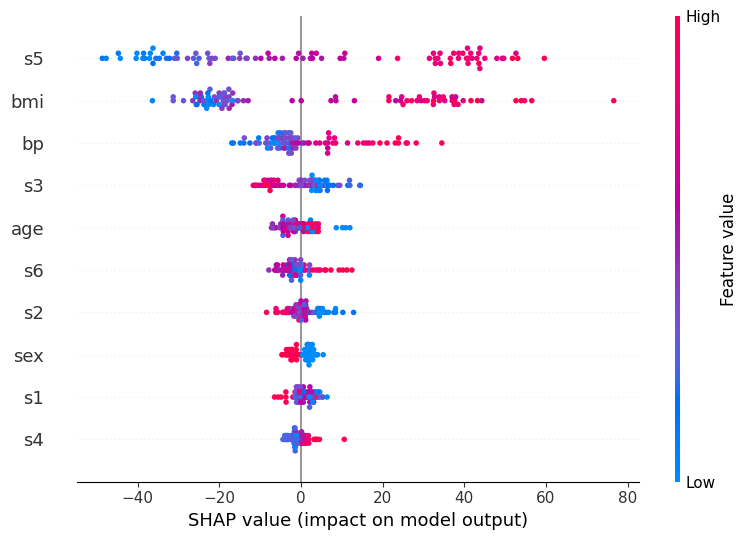

In [14]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

# explain all the predictions in the test set
explainer = shap.TreeExplainer(rforest)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)